This project is to establish ML methods on measurement of transcriptome assembly's quality using a evaluation matrix.



## Item 1. raw data process

In [2]:
#1.1 import data from excel spread sheet
import xlrd
import pandas as pd
from pandas import ExcelFile

xls = pd.ExcelFile('/Users/chenmingcui/Desktop/MachineLearning_projects/transrate_all+coveragefixed.xlsx')
df1 = pd.read_excel (xls,'all_ref')
df1.head()


,Assembly,assembly,stage,genus,specie,accession,busco_completeness%,rsem_score,n_seqs,smallest,...,reference_coverage,score,optimal_score,cutoff,weighted,Total Number of Read 1,Total Number of Read 2,Filtered Number of Paired Reads,Number of Reads saved as Single Reads,Discared
0,0,ref_guid,post,cap,chacoense,g1038_10_Trinity-GG.fasta.fixed.fasta,72.7,-566627107.2,69580,201,...,0.49594,0.37033,0.48931,0.11742,5.87218,10352258,10352258,10352258,0,0
1,0,ref_guid,post,cap,chacoense,g1038_11_Trinity-GG.fasta.fixed.fasta,79.3,-617758148.3,90155,201,...,0.55543,0.36297,0.53607,0.27356,5.34159,10678384,10678384,10678384,0,0
2,0,ref_guid,post,cap,chacoense,g1038_12_Trinity-GG.fasta.fixed.fasta,68.5,-451606120.6,68331,201,...,0.49353,0.37381,0.50198,0.19573,6.33713,7153326,7153326,7153326,0,0
3,0,ref_guid,post,cap,annuum,g1038_13_Trinity-GG.fasta.fixed.fasta,69.6,-534134852.5,71000,201,...,0.50143,0.32183,0.43132,0.04787,3.73936,10136538,10136538,10136538,0,0
4,0,ref_guid,post,cap,eximium,g1038_14_Trinity-GG.fasta.fixed.fasta,71.7,-619276914.4,75526,201,...,0.48570,0.30915,0.48104,0.23905,5.35936,11084651,11084651,11084651,0,0


In [7]:
#1.2 remove rows that missing vaules (busco has missing values):
df2 = df1.dropna()
df2   # 48 rows × 72 columns
df2.head()

,assembly,stage,genus,specie,accession,busco_completeness%,rsem_score,n_seqs,smallest,largest,...,reference_coverage,score,optimal_score,cutoff,weighted,Total Number of Read 1,Total Number of Read 2,Filtered Number of Paired Reads,Number of Reads saved as Single Reads,Discared
6,ref_guid,post,sol,pennellii,g1038_4_Trinity-GG.fasta.fixed.fasta,80.2,-500251787.9,57821,201,11506,...,0.59358,0.42535,0.55044,0.19321,8.42570,9336015,9336015,9336015,0,0
7,ref_guid,post,sol,galapagense,g1038_6_Trinity-GG.fasta.fixed.fasta,80.0,-429640740.1,57997,201,9334,...,0.59676,0.45934,0.56816,0.18362,8.80763,8061444,8061444,8061444,0,0
8,ref_guid,post,sol,neorickii,g1038_7_Trinity-GG.fasta.fixed.fasta,75.9,-456955039.7,54457,201,7180,...,0.58065,0.43721,0.53233,0.09144,8.21900,8301213,8301213,8301213,0,0
9,ref_guid,post,sol,corneliomuelleri,g1038_8_Trinity-GG.fasta.fixed.fasta,81.2,-597488516.8,61861,201,13728,...,0.60845,0.39943,0.56149,0.24123,7.77524,10496523,10496523,10496523,0,0
10,ref_guid,post,sol,ochranthum,g1038_9_Trinity-GG.fasta.fixed.fasta,77.5,-520936615.3,44552,201,10220,...,0.56248,0.39513,0.50900,0.37699,10.22105,7597136,7597136,7597136,0,0


In [8]:
#1.3 remove non-relevant features (columns): this removal is based on personal personal experience
# some feature selection methods like clustering can be applied in an alternative approach.
list(df2.columns.values)

['assembly',
 'stage',
 'genus',
 'specie',
 'accession',
 'busco_completeness%',
 'rsem_score',
 'n_seqs',
 'smallest',
 'largest',
 'n_bases',
 'mean_len',
 'n_under_200',
 'n_over_1k',
 'n_over_10k',
 'n_with_orf',
 'mean_orf_percent',
 'n90',
 'n70',
 'n50',
 'n30',
 'n10',
 'gc',
 'gc_skew',
 'at_skew',
 'cpg_ratio',
 'bases_n',
 'proportion_n',
 'linguistic_complexity',
 'fragments',
 'fragments_mapped',
 'p_fragments_mapped',
 'good_mappings',
 'p_good_mapping',
 'bad_mappings',
 'potential_bridges',
 'bases_uncovered',
 'p_bases_uncovered',
 'contigs_uncovbase',
 'p_contigs_uncovbase',
 'contigs_uncovered',
 'p_contigs_uncovered',
 'contigs_lowcovered',
 'p_contigs_lowcovered',
 'contigs_segmented',
 'p_contigs_segmented',
 'CRBB_hits',
 'n_contigs_with_CRBB',
 'p_contigs_with_CRBB',
 'rbh_per_reference',
 'n_refs_with_CRBB',
 'p_refs_with_CRBB',
 'cov25',
 'p_cov25',
 'cov50',
 'p_cov50',
 'cov75',
 'p_cov75',
 'cov85',
 'p_cov85',
 'cov95',
 'p_cov95',
 'reference_coverage',


In [9]:
quality_df = df2.drop(columns=['assembly','stage','genus','specie','accession','rsem_score',
                              'score','optimal_score','weighted','Number of Reads saved as Single Reads',
                              'Discared'])
quality_df.head()

,busco_completeness%,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,cutoff,Total Number of Read 1,Total Number of Read 2,Filtered Number of Paired Reads
6,80.2,57821,201,11506,53423538,923.94697,0,19339,2,23552,...,0.44464,14543,0.41880,13403,0.38598,0.59358,0.19321,9336015,9336015,9336015
7,80.0,57997,201,9334,54325124,936.68852,0,19767,0,23714,...,0.45241,14756,0.42494,13585,0.39122,0.59676,0.18362,8061444,8061444,8061444
8,75.9,54457,201,7180,49338341,906.00549,0,18301,0,23156,...,0.43911,14252,0.41042,12994,0.37420,0.58065,0.09144,8301213,8301213,8301213
9,81.2,61861,201,13728,56236262,909.07457,0,19896,4,24789,...,0.45924,15081,0.43430,13944,0.40156,0.60845,0.24123,10496523,10496523,10496523
10,77.5,44552,201,10220,41159837,923.86059,0,15202,1,21212,...,0.40959,13319,0.38356,12063,0.34739,0.56248,0.37699,7597136,7597136,7597136




## Item2. Application to dataset

### 2.1-prepare y and x

In [3]:

from sklearn.cross_validation import train_test_split

# define x and y in the regression
X = quality_df.loc[:, quality_df.columns != 'busco_completeness%']
y = quality_df['busco_completeness%']*0.01

#### some exploration on feature pairs: corrlection analysis on all the possible feature pairs

# unable to compute pair-wise scatter plot.. matrix is too heavy..
# from matplotlib import cm
# cmap = cm.get_cmap('gnuplot')
# scatter = pd.scatter_matrix(X_train, c= y_train, marker ='o', s =40, hist_kwds ={'bins':15},
#                            figsize=(12,12),cmap=cmap)
####

ModuleNotFoundError: No module named 'sklearn.cross_validation'

### 2.2-split and scale data

In [68]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


### 2.3-fit models

#### 2.3.1-fit Least-Squares Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
#linreg = LinearRegression().fit(X_train_scaled, y_train)
linreg = LinearRegression().fit(X_train, y_train)
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
print('#####################')
print('LS is terribly fitted')

linear model coeff (w): [ 2.13201976e-05  3.42004833e-03  1.23657424e-05 -1.07576110e-07
 -7.30578512e-04 -6.15720602e-08  2.58164901e-04 -2.07563425e-03
 -1.60311090e-05  1.03334134e-02 -1.26860561e-03  2.00565644e-04
 -3.96709269e-04  1.21005233e-03  9.23286434e-05  3.89031230e-02
  3.23722159e-01 -3.28982795e-01  8.48658758e-01  2.18879179e-08
 -1.24094716e-08  6.76047019e-02 -1.28828541e-07  5.93193853e-08
 -5.27463248e-01  1.11784230e-07 -6.31137746e-01  1.07909471e-07
  4.20489356e-06  5.19225112e-09 -1.07410789e-01  1.86003231e-05
 -7.93448758e-01  1.85997180e-05 -1.90724952e-01 -5.55490894e-06
  7.11578954e-01 -2.98682037e-05 -1.49848505e-01 -8.49251846e-06
 -8.49251846e-06 -1.53371042e-01  2.22748958e-03 -2.93343977e-06
 -4.03608340e-04 -2.20614796e-05  1.76387070e-03  7.96527771e-05
  2.54147265e-03  2.07906586e-04 -1.93901352e-03 -1.02945545e-04
  9.71399377e-04 -2.16790286e-04 -1.15032676e-03  6.83353221e-01
  1.10740063e-01 -5.78556418e-09 -5.78556418e-09 -5.78556418e-09]


#### 2.3.2-Ridge Regression

In [93]:
import numpy as np
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linridge = Ridge(alpha= 100000).fit(X_train, y_train)
#what ridge regression is doing... It's regularizing the linear regression by imposing that 
#sum of squares penalty on the size of the W coefficients. So the effect of increasing 
#alpha is to shrink the AW coefficients toward zero and towards each other. 
#But if the input variables, the features, have very different scales, then when this 
#shrinkage happens of the coefficients, input variables with different scales will have 
#different contributions to this L2 penalty, because the L2 penalty is a sum of squares 
#of all the coefficients. 
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('linear model intercept: {}'.format(linridge.intercept_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_!=0)))
print('#####################')


ridge regression linear model coeff:
[ 5.21468815e-06 -1.33549645e-07 -3.70243748e-07 -2.36312792e-09
  2.99764251e-06  0.00000000e+00  7.86275677e-06 -1.01499091e-06
 -9.23687383e-06  1.62474027e-07 -1.26909077e-06  7.73242076e-06
  1.43549954e-05  1.45543893e-05  1.55116143e-05  1.75659977e-10
 -1.32666125e-10 -9.73274145e-11 -1.34200975e-09  0.00000000e+00
  0.00000000e+00  4.32487555e-10 -7.32693028e-09  7.56357010e-09
  1.69585405e-09  7.44417605e-09  8.98535269e-10  1.19393648e-10
  4.94264236e-06 -1.15244279e-08 -7.63831085e-11 -1.95159324e-06
  2.27387912e-10  8.13393529e-06  3.24856854e-10 -1.63672520e-06
 -1.98104087e-09 -8.00400683e-06  2.64885132e-10 -1.73414921e-08
 -1.73414921e-08  6.25246225e-10 -3.95009535e-13 -2.64829384e-05
 -7.63306261e-10  1.65653802e-06  4.85572276e-11  8.89577261e-06
  2.55745253e-10  2.55466103e-05  7.35596389e-10  1.22261508e-05
  3.50600084e-10  1.81862305e-05  5.21624622e-10  2.68674625e-09
  2.01853720e-08 -2.50345067e-09 -2.50345067e-09 -2.5

#### 2.3.2-(1)Ridge regression with feature normalization

In [135]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

linridge = Ridge(alpha = 10.0).fit(X_train_scaled, y_train)

print ('assembly quality in redge regression')
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('linear model intercept: {}'.format(linridge.intercept_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_!=0)))
print('#####################')


assembly quality in redge regression
ridge regression linear model coeff:
[ 0.0061556  -0.00823254  0.00977056  0.00560492  0.00708403  0.
  0.00565217  0.00275762  0.00521416 -0.00530425  0.00267695  0.01010778
  0.01063335  0.0100177   0.00976701 -0.00558904 -0.00288919 -0.00655488
 -0.00808859  0.          0.          0.00634194  0.00135345  0.00214475
  0.0062833   0.00276635  0.00621629 -0.00079494  0.00414964  0.00282445
  0.00308949  0.00446772  0.004235    0.00777788  0.00559971  0.00550994
 -0.0053357   0.00198614 -0.00052289  0.00443677  0.00443677 -0.00781521
  0.00443675  0.00732129  0.0073206   0.00783344  0.00783319  0.00852843
  0.00852844  0.00923128  0.00923153  0.00941738  0.00941707  0.00958106
  0.0095809   0.00922021  0.00422254  0.00129592  0.00129592  0.00129592]
linear model intercept: 0.6322562982542453
R-squared score (training): 0.896
R-squared score (test): 0.628
Number of non-zero features: 57
#####################


#### 2.3.2-(2) cross validation for the above model

In [128]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha = 10.0).fit(X_train_scaled, y_train)

X_cv = X.as_matrix()
y_cv = y.as_matrix()
cv_scores = cross_val_score(linridge, X_cv, y_cv, cv = 3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))


Cross-validation scores (3-fold): [0.88213609 0.64145245 0.51957518]
Mean cross-validation score (3-fold): 0.681


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


######  2.3.2-(3) -Ridge regression select regularization parameter: alpha

In [100]:
print('test different alpha values in my regression model')
for test_alpha in [10,10.5,11,12,15,18,20,30,40,50,60,100]:
    linridge = Ridge(alpha = test_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\n\
    num abs(coeff) > 1.0: {}, \
    r-seqared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(test_alpha, num_coeff_bigger, r2_train, r2_test))
                              

test different alpha values in my regression model
Alpha = 10.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.90, r-squared test: 0.63

Alpha = 10.50
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.89, r-squared test: 0.62

Alpha = 11.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.89, r-squared test: 0.62

Alpha = 12.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.88, r-squared test: 0.61

Alpha = 15.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.87, r-squared test: 0.58

Alpha = 18.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.85, r-squared test: 0.56

Alpha = 20.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.84, r-squared test: 0.55

Alpha = 30.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.79, r-squared test: 0.49

Alpha = 40.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.75, r-squared test: 0.45

Alpha = 50.00
    num abs(coeff) > 1.0: 0,     r-seqared training: 0.71, r-squared test: 0.41


#### 2.3.3 Lasso regression
###### effect of setting parameter weights in w to zero for least influential variables, called 
###### sparse solution: a kind of feature selection

In [121]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha = 0.1, max_iter = 10000).fit(X_train_scaled, y_train)
print ('assembly quality in lasso regression')
print('Lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
print('Lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linlasso.score(X_test_scaled, y_test)))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_!=0)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] !=0:
        print('\t{}, {:.3f}'.format(e[0],e[1]))
print('#####################')



assembly quality in lasso regression
Lasso regression linear model coeff:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
Lasso regression linear model intercept: 0.7724444444444445
R-squared score (training): 0.000
R-squared score (test): -0.183
Non-zero features: 0
Features with non-zero weight (sorted by absolute magnitude):
#####################


##### 2.3.3(1) tuning alpha on Lasso model

In [110]:
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50, 100, 1000, 10000]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print ('Alpha = {:.2f}\n\
Feature kept: {}, r-square training: {:.2f}, \
r-square test: {:.2f}\n'
          .format(alpha, np.sum(linlasso.coef_ !=0), r2_train, r2_test))

Alpha = 0.50
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 1.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 2.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 3.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 5.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 10.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 20.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 50.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 100.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 1000.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18

Alpha = 10000.00
Feature kept: 0, r-square training: 0.00, r-square test: -0.18



### 2.3.4- Polynomial Features with linear regression

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)
print('**')
print('linear model coeff:\n{}'.format(linreg.coef_))
print('linear model intercept: {}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
print('**')

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state =0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w): \n{}'
      .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
      .format(linreg.intercept_))
print('(poly deg2) R-squared score (training): {:.3f}'
      .format(linreg.score(X_train, y_train)))
print('(poly deg2) R-squared score (test): {:.3f}\n'
      .format(linreg.score(X_test, y_test)))
print('----------- add penality using ridge regression')

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state =0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w): \n{}'
      .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
      .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
      .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
      .format(linreg.score(X_test, y_test)))

**
linear model coeff:
[ 2.13201976e-05  3.42004833e-03  1.23657424e-05 -1.07576110e-07
 -7.30578512e-04 -6.15720602e-08  2.58164901e-04 -2.07563425e-03
 -1.60311090e-05  1.03334134e-02 -1.26860561e-03  2.00565644e-04
 -3.96709269e-04  1.21005233e-03  9.23286434e-05  3.89031230e-02
  3.23722159e-01 -3.28982795e-01  8.48658758e-01  2.18879179e-08
 -1.24094716e-08  6.76047019e-02 -1.28828541e-07  5.93193853e-08
 -5.27463248e-01  1.11784230e-07 -6.31137746e-01  1.07909471e-07
  4.20489356e-06  5.19225112e-09 -1.07410789e-01  1.86003231e-05
 -7.93448758e-01  1.85997180e-05 -1.90724952e-01 -5.55490894e-06
  7.11578954e-01 -2.98682037e-05 -1.49848505e-01 -8.49251846e-06
 -8.49251846e-06 -1.53371042e-01  2.22748958e-03 -2.93343977e-06
 -4.03608340e-04 -2.20614796e-05  1.76387070e-03  7.96527771e-05
  2.54147265e-03  2.07906586e-04 -1.93901352e-03 -1.02945545e-04
  9.71399377e-04 -2.16790286e-04 -1.15032676e-03  6.83353221e-01
  1.10740063e-01 -5.78556418e-09 -5.78556418e-09 -5.78556418e-09]
l

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


#### 2.3.5- Decision tree
######(no need for scaling)

In [256]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree # additional script

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeRegressor(max_depth = 7, random_state = 7).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))
# y.name
# #plot_decision_tree(clf, X.columns.values, y.name ) 

## unable to plot decision tree for regression model, the "y" has to be tags.

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.69


###### decision tree - feature importance

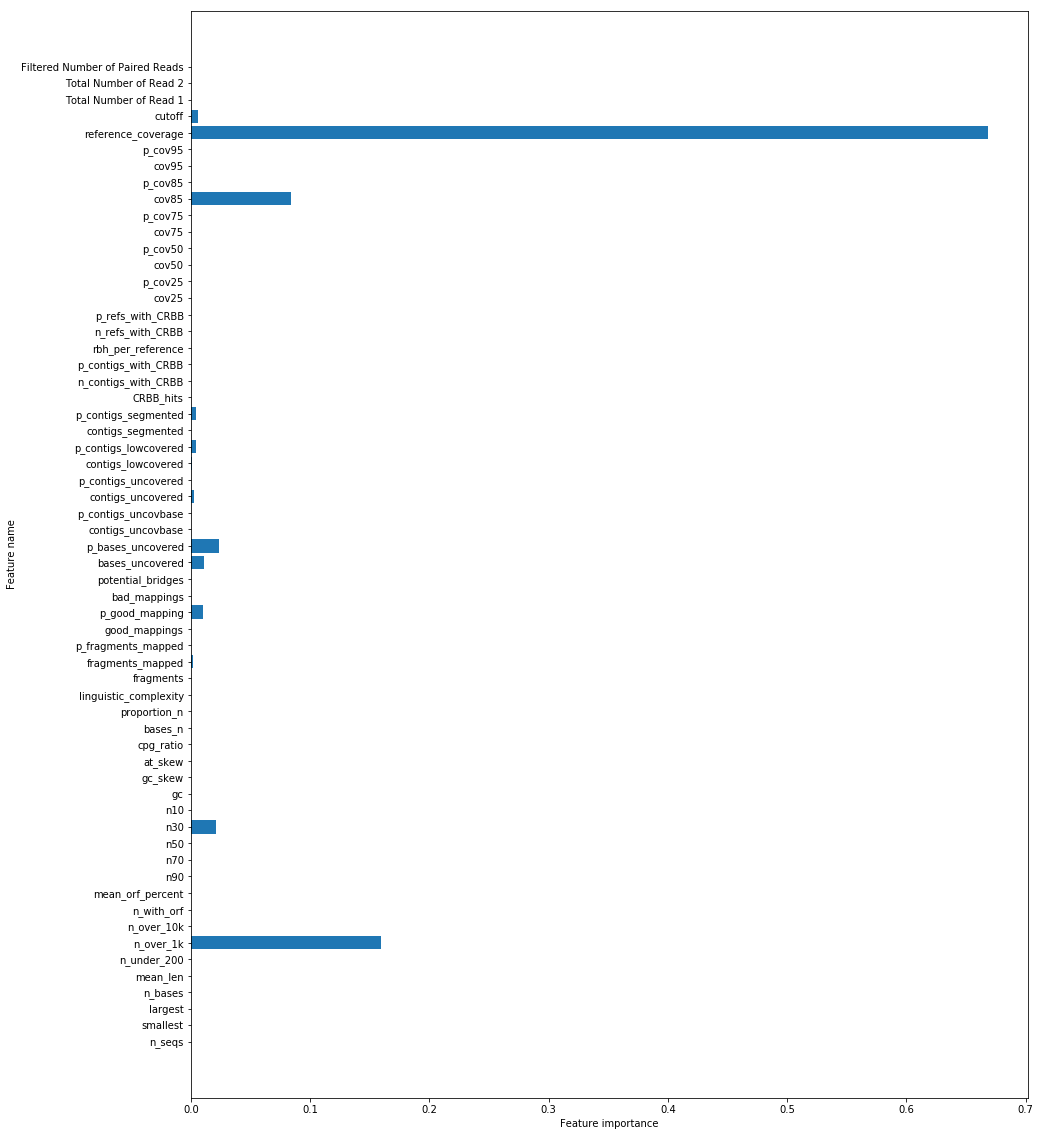

In [257]:
X.columns.values

from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(15,20))
plot_feature_importances(clf,X.columns.values)
plt.show()
# #quality_df.busco_completeness%

#### 2.3.6- Gradient Boosted Decision Trees

In [ ]:
# training builds a series of samll decision trees.
# each tree attempts to correct errors from the previous stage
# no need to apply feature scaling...

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fig, subaxes = plt.subplots(1,1,figsize=(6,6))

#clf = GradientBoostingRegressor(random_state =0,).fit(X_train, y_train)

print('assembly quality assessment (learn_rate =0.1, max_depth=3)')
print('Accuracy of GBDT regression on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT regression on test set: {:.2f}\n'
      .format(clf.score(X_test,y_test )))

##@@@@@@@@@@@@@@@@ test parameters

clf = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.01, max_depth = 2,
                                random_state = 0).fit(X_train, y_train)

print('assembly quality assessment (learn_rate =0.01, max_depth=2)')
print('Accuracy of GBDT regression on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT regression on test set: {:.2f}\n'
      .format(clf.score(X_test,y_test )))




assembly quality assessment (learn_rate =0.1, max_depth=3)
Accuracy of GBDT regression on training set: 0.97
Accuracy of GBDT regression on test set: 0.85

assembly quality assessment (learn_rate =0.01, max_depth=2)
Accuracy of GBDT regression on training set: 0.99
Accuracy of GBDT regression on test set: 0.70



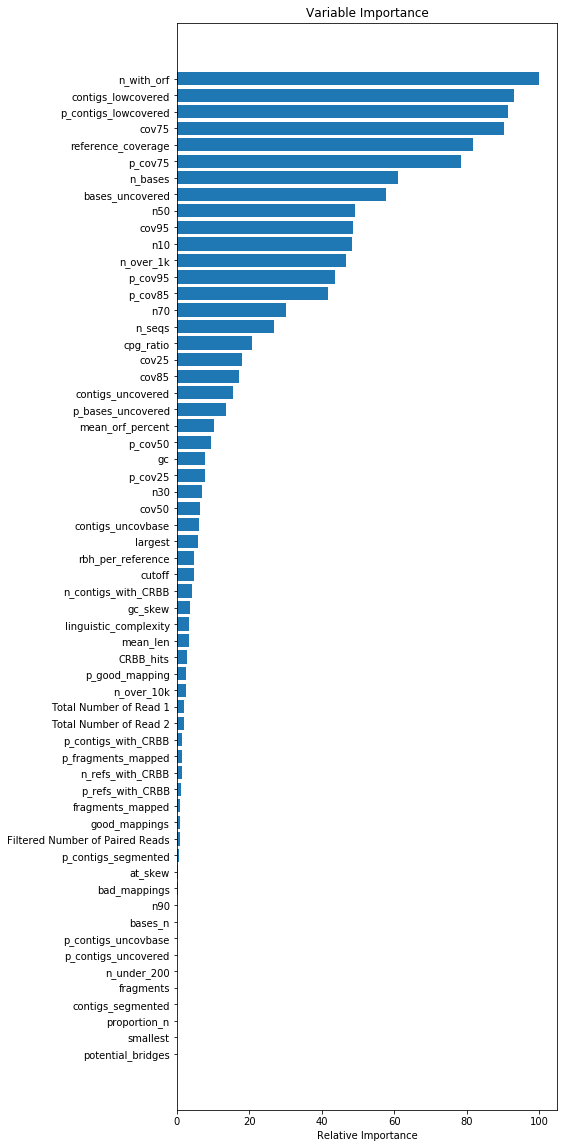

In [391]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Text(0,0.5,'Deviance')

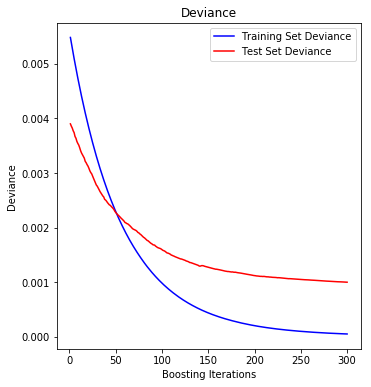

In [398]:
# Plot training deviance

# compute test set deviance
params ={'n_estimators':300, 'max_depth':2, 'learning_rate': 0.01, 'loss':'ls'}
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

#### 2.3.7- Neural Network Regression with MLPregressor

ValueError: shapes (50,1) and (60,100) not aligned: 1 (dim 1) != 60 (dim 0)

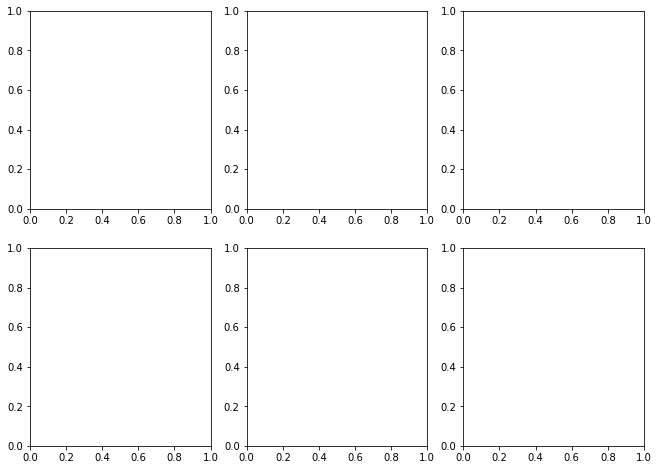

In [409]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize =(11,8))

X_predict_input = np.linspace(-3, 3, 50).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()
                          

In [410]:
from sklearn.neural_network import MLPRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
y_predict_output = mlpreg.predict(X_predict_input)

ValueError: shapes (50,1) and (60,100) not aligned: 1 (dim 1) != 60 (dim 0)

#### Random Forests

In [39]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestRegressor( max_features = 18, random_state = 0)
#clf = RandomForestRegressor(n_estimators=10, max_features = 18, random_state = 0)
clf.fit(X_train, y_train)

print('Accuracy of RF regressor on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF regressor on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))





Accuracy of RF regressor on training set: 0.97
Accuracy of RF regressor on test set: 0.85


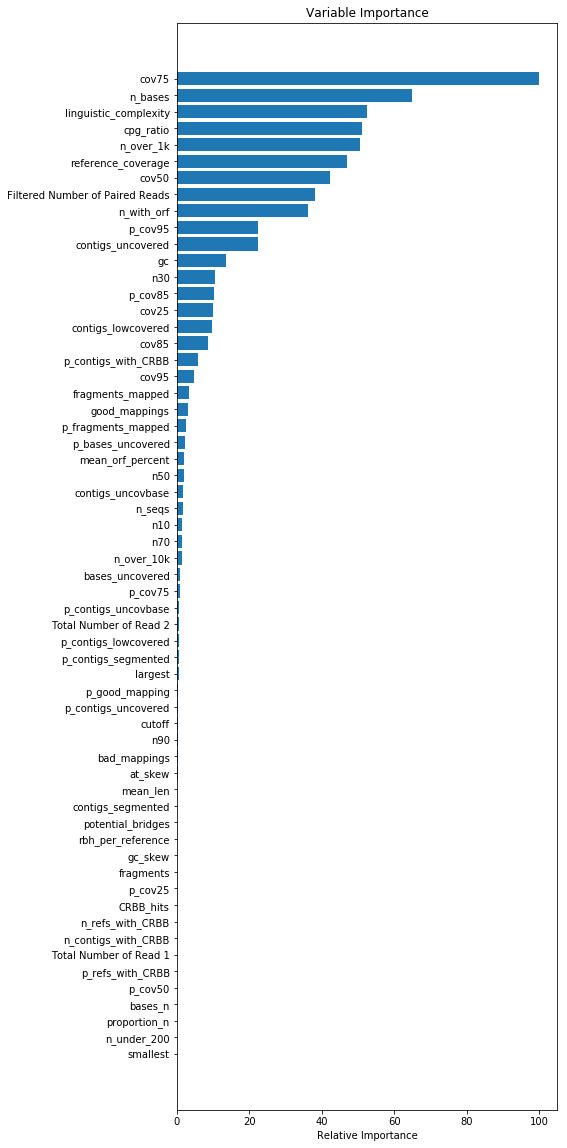

In [44]:
import numpy as np
import matplotlib.pyplot as plt
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

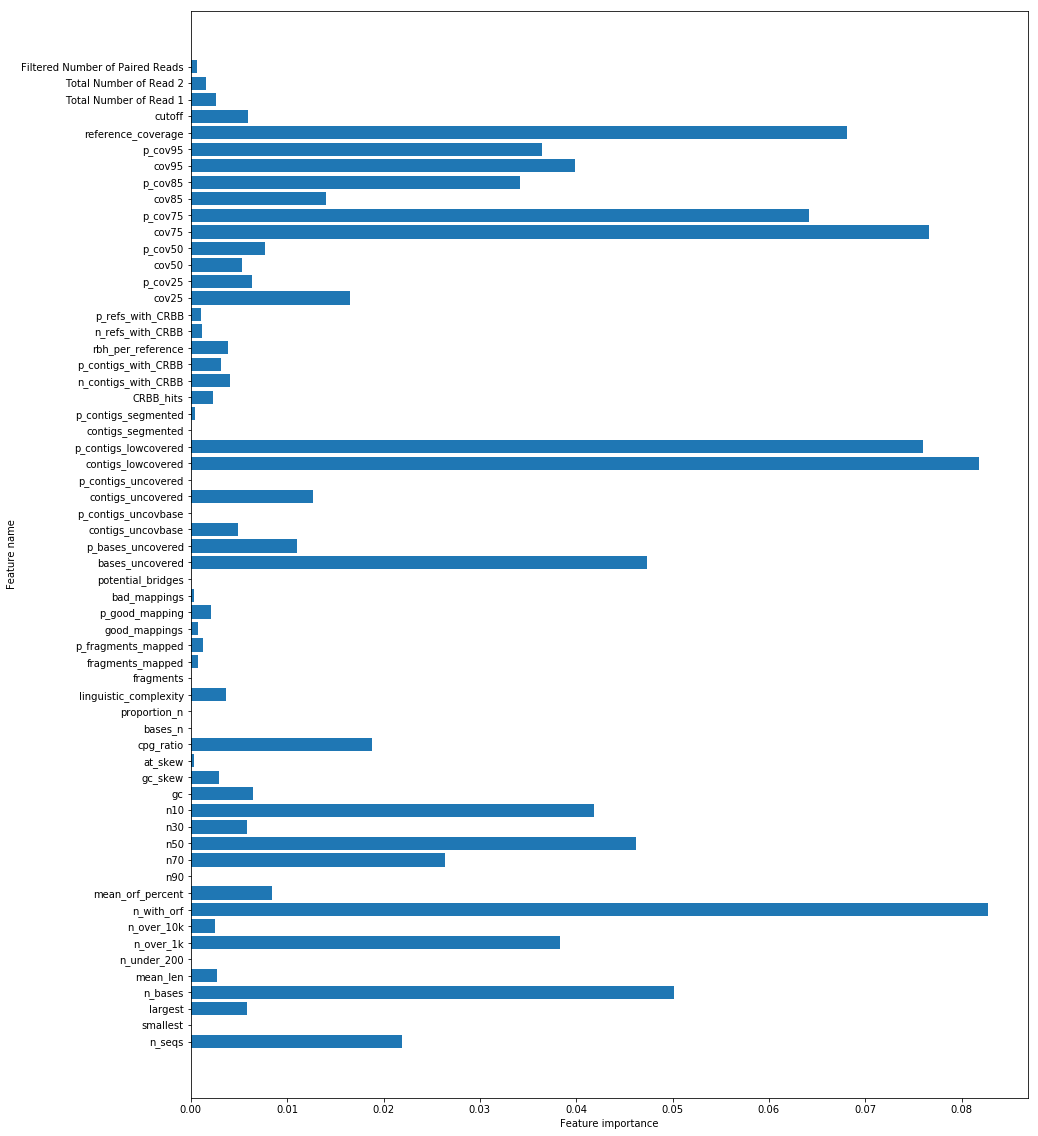

In [46]:
X.columns.values

from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(15,20))
plot_feature_importances(clf,X.columns.values)
plt.show()